### Submitted by Kumar Apurva 2K18/MC/058 and Madhuresh Mayank 2K18/MC/062

# MACD 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## 1. Data reading from file

In [2]:
DATA_FILE_PATH = "apple.csv"
df = pd.read_csv(DATA_FILE_PATH, sep=',')
                 
TIMESTAMP_NAME = "Date" # timestamp name from .csv
PRICE_NAME = "Close" # define price name that will be used from .csv

## 2. Calculate MACD indicator and add it to subplot

In [3]:
def calculate_macd(df, PRICE_NAME, period1, period2, period3): # default MACD period values are: period1 = 26, period2 = 12, period3 = 9.
    EMA_1 = df[PRICE_NAME].ewm(span=period1, adjust=False).mean()
    EMA_2 = df[PRICE_NAME].ewm(span=period2, adjust=False).mean()
    MACD_line = EMA_2 - EMA_1
    MACD_Signal_line = MACD_line.ewm(span=period3, adjust=False).mean()
    MACD_Histogram = MACD_line - MACD_Signal_line
    return MACD_line, MACD_Signal_line, MACD_Histogram

## 3. Show historic price data in the first subplot and MACD on other

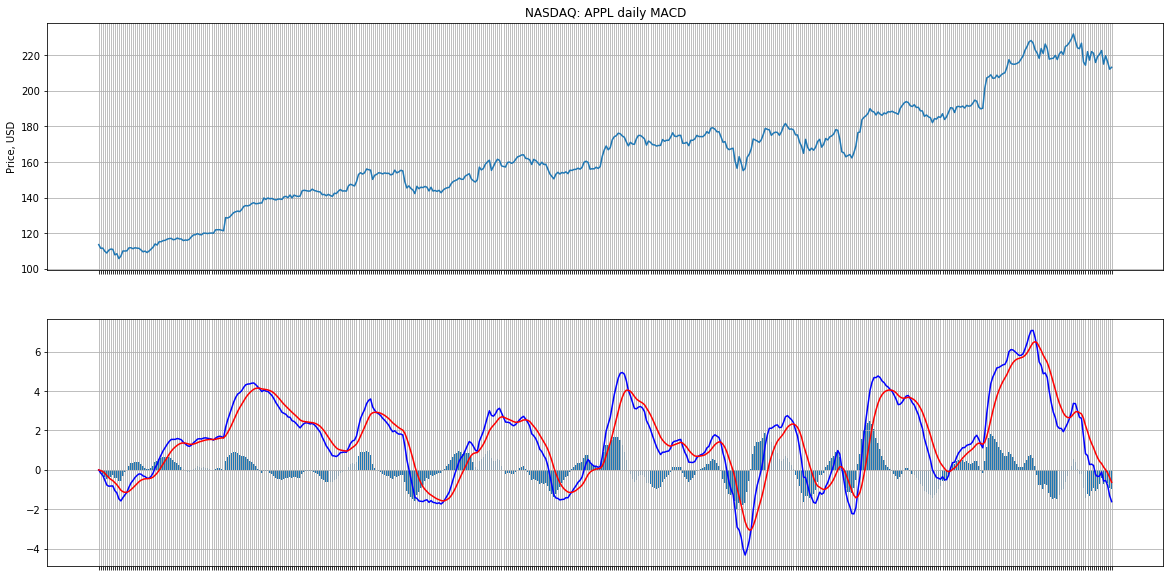

In [4]:
MACD_line, MACD_Signal_line, MACD_Histogram = calculate_macd(df, PRICE_NAME, 26, 12, 9) # calculating with the default MACD values

plt.figure(figsize=(20,10)) # change default figure size
ax1 = plt.subplot(2, 1, 1)
plt.plot(df[TIMESTAMP_NAME], df[PRICE_NAME])
plt.title("NASDAQ: APPL daily MACD")
plt.ylabel("Price, USD")
plt.grid()

frame1 = plt.gca() # hide x axis values
val1=frame1.axes.xaxis.set_ticklabels([])

# add data to subplot
ax2 = plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(df[TIMESTAMP_NAME], MACD_line, color = 'blue')
plt.plot(df[TIMESTAMP_NAME], MACD_Signal_line, color = 'red')
plt.bar(df[TIMESTAMP_NAME], MACD_Histogram)
plt.grid()

frame1 = plt.gca() # hide x axis values
val2=frame1.axes.xaxis.set_ticklabels([])